### Ridge regression is a linear regression technique that adds a penalty term to the cost function (sum of squares of residuals) to prevent overfitting.

### Ridge regression, also known as Tikhonov regularization or L2 regularization

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv('Hyderabad.csv')
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
data.shape

(2518, 40)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                2518 non-null   int64 
 1   Area                 2518 non-null   int64 
 2   Location             2518 non-null   object
 3   No. of Bedrooms      2518 non-null   int64 
 4   Resale               2518 non-null   int64 
 5   MaintenanceStaff     2518 non-null   int64 
 6   Gymnasium            2518 non-null   int64 
 7   SwimmingPool         2518 non-null   int64 
 8   LandscapedGardens    2518 non-null   int64 
 9   JoggingTrack         2518 non-null   int64 
 10  RainWaterHarvesting  2518 non-null   int64 
 11  IndoorGames          2518 non-null   int64 
 12  ShoppingMall         2518 non-null   int64 
 13  Intercom             2518 non-null   int64 
 14  SportsFacility       2518 non-null   int64 
 15  ATM                  2518 non-null   int64 
 16  ClubHo

In [23]:
data.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [24]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,2.518000e+03,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,...,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,9.818380e+06,1644.571088,2.623511,0.227562,0.412629,0.739873,0.709690,0.619142,0.559968,0.606434,...,0.975774,0.360207,0.607228,0.342732,0.330024,0.321287,0.334392,0.342335,0.341144,0.324861
std,8.777113e+06,746.256956,0.687330,0.419341,1.626445,1.611024,1.615231,1.624426,1.627686,1.625308,...,1.557725,1.622778,1.625256,1.621178,1.619894,1.618953,1.620347,1.621139,1.621023,1.619344
min,2.000000e+06,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.760000e+06,1160.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.754000e+06,1500.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.090000e+07,1829.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.650000e+08,9400.000000,8.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [25]:
# checking duplicates
data.duplicated().sum()

520

In [26]:
data.drop_duplicates()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


### feature scaling

In [27]:
# apply log for scaling and overcoming the sckewness
data['Area']=np.log1p(data['Area'])

In [28]:
# apply log for scaliong and overcoming the sckewness and avoid negative predicted values
data['Price']=np.log1p(data['Price'])

In [29]:
x=data.drop(['Price','Location'],axis=1) #independent
y=data['Price']         #dependent

### Ridge regression

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_squared_error

# create and train ridge regression model
ridge=Ridge(alpha=0.2)   #regularization strength
ridge.fit(x_train,y_train)

y_pred1=ridge.predict(x_test)

# evaluate model
print('R2 score: ',r2_score(y_test,y_pred1))
print('MSE: ',mean_squared_error(y_test,y_pred1))

R2 score:  0.7892632839503204
MSE:  0.07948949824437056


### plotting

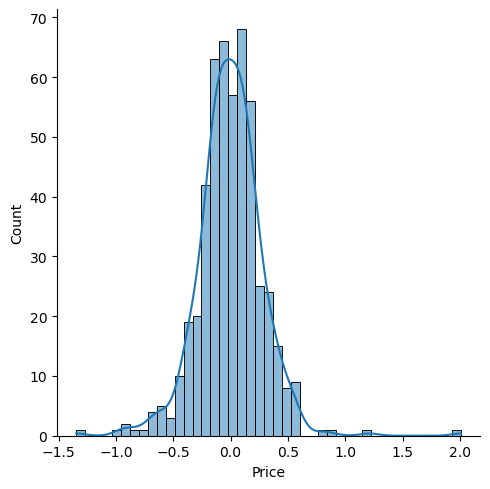

In [32]:
import seaborn as sns
sns.displot(y_test-y_pred1,kde='True')

In [33]:
# distrbtn of errors btwn actual target values and target values

In [21]:
import joblib
joblib.dump(ridge,'ridge_regression_model1.joblib')

['ridge_regression_model1.joblib']

### Hyper parameter tuning

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
ridge=Ridge()
params={'alpha':[1e-5,1e-10,1e-15,1e-8,1e-3,1e-2,1e-1,1e-6,1e-4,0.5,1,1.5,3,2,10,50,100,5,20,30,40,60,70,80,90]}

#create gridsearchcv object
grid_search=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)  #cv=5  cross validation,evaluate model by splitting the datasets to multiple subsets
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 1e-10, 1e-15, 1e-08, 0.001, 0.01, 0.1,
                                   1e-06, 0.0001, 0.5, 1, 1.5, 3, 2, 10, 50,
                                   100, 5, 20, 30, 40, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

#### The reason for using 'neg_mean_squared_error' is that GridSearchCV tries to maximize the score, but mean squared error is a loss function that should be minimized. By using the negation, scikit-learn can still maximize the negative mean squared error, effectively minimizing the mean squared error.

In [24]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1e-15}
-0.2539100053786022


In [19]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

data=pd.read_csv('Hyderabad.csv')
data.head()


# apply log for scaling and overcoming the sckewness
data['Area']=np.log1p(data['Area'])
# apply log for scaling and overcoming the sckewness
data['Price']=np.log1p(data['Price'])


X=data.drop(['Price','Location'],axis=1) #independent
y=data['Price']  

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the initial model (without ridge regression)
initial_model = Ridge(alpha=0)  # Alpha=0 means no regularization (equivalent to linear regression)
initial_model.fit(X_train_scaled, y_train)
initial_preds = initial_model.predict(X_test_scaled)

# Evaluate initial model performance
initial_mse = mean_squared_error(y_test, initial_preds)
initial_r2 = r2_score(y_test, initial_preds)

print("Initial Model Performance:")
print("Mean Squared Error:", initial_mse)
print("R-squared:", initial_r2)

# Train and evaluate the ridge regression model
ridge_model = Ridge(alpha=5)  # Choose an appropriate alpha value (regularization strength)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)

# Evaluate ridge regression model performance
ridge_mse = mean_squared_error(y_test, ridge_preds)
ridge_r2 = r2_score(y_test, ridge_preds)

print("\nRidge Regression Model Performance:")
print("Mean Squared Error:", ridge_mse)
print("R-squared:", ridge_r2)

Initial Model Performance:
Mean Squared Error: 0.07949156887810244
R-squared: 0.7892577944383417

Ridge Regression Model Performance:
Mean Squared Error: 0.07918437211295332
R-squared: 0.7900722119261662


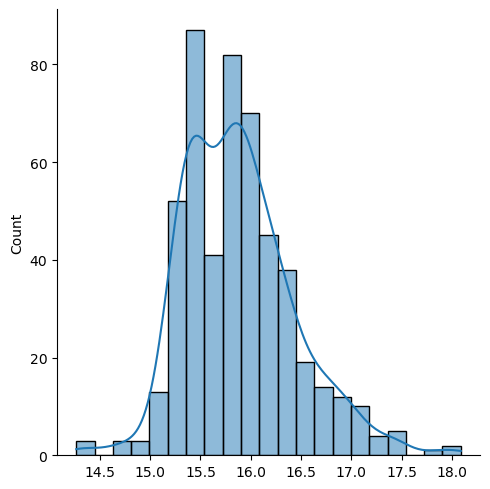

In [40]:
import seaborn as sns
sns.displot(initial_preds,kde='True')

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model=LinearRegression()
mse=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.39073640083888783


In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge


ridge=Ridge(alpha=1e-3)
mse=cross_val_score(ridge,x,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-0.390736687313186


In [35]:
ridge=Ridge()
params={'alpha':[1e-5,1e-10,1e-15,1e-8,1e-3,1e-2,1e-1,1e-6,1e-4,0.5,1,1.5,3,2,10,50,100,5,20,30,40,60,70,80,90]}

#create gridsearchcv object
grid_search=GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)  #cv=5  cross validation,evaluate model by splitting the datasets to multiple subsets
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 1e-10, 1e-15, 1e-08, 0.001, 0.01, 0.1,
                                   1e-06, 0.0001, 0.5, 1, 1.5, 3, 2, 10, 50,
                                   100, 5, 20, 30, 40, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [36]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 1e-15}
-0.3907364008388895
